# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/smoking-dataset-from-uk/smoking.csv')

**gender	Gender with levels Female and Male.**

**age	Age.**

**marital_status	Marital status with levels Divorced, Married, Separated, Single and Widowed.**

**highest_qualification	Highest education level with levels A Levels, Degree, GCSE/CSE, GCSE/O Level, Higher/Sub Degree, No Qualification, ONC/BTEC and Other/Sub Degree**

**nationality	Nationality with levels British, English, Irish, Scottish, Welsh, Other, Refused and Unknown.**

**ethnicity	Ethnicity with levels Asian, Black, Chinese, Mixed, White and Refused Unknown.**

**gross_income	Gross income with levels Under 2,600, 2,600 to 5,200, 5,200 to 10,400, 10,400 to 15,600, 15,600 to 20,800, 20,800 to 28,600, 28,600 to 36,400, Above 36,400, Refused and Unknown.**

**region	Region with levels London, Midlands And East Anglia, Scotland, South East, South West, The North and Wales**

**smoke	Smoking status with levels No and Yes**

**amt_weekends	Number of cigarettes smoked per day on weekends.**

**amt_weekdays	Number of cigarettes smoked per day on weekdays.**

**type	Type of cigarettes smoked with levels Packets, Hand-Rolled, Both/Mainly Packets and Both/Mainly Hand-Rolled**

# Expolre the Data

In [3]:
df.shape

(1691, 13)

In [4]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
df.tail()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets
1690,1691,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


**We will not drop Column amt_weekends and amt_weekdays and type from data when clean the data i will handle that becouse this have alot of nan value**

In [7]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [8]:
df.isna().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

**we have alot of data have nan value and i will handle this in clean data**

In [9]:
df.duplicated().sum()

0

**No Duplicated data**

# Cleaning the data

In [10]:
no_smoke_rows = df.loc[df['smoke'] == 'No']
df.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0

**# Select rows where `smoke` is `'No'`**

**# Set `amt_weekends` and `amt_weekdays` to `0` for those rows**

**Make that becouse i now i have people no smoke then make the amount in weekday and weekend equal to 0**

In [11]:
no_smoke_rows = df.loc[df['smoke'] == 'No']
df.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'

**# Replace NaN values in the `type` column with 'Non-Smoker' for non-smokers**

**from type i can now what he is smoke packet or what moked with levels Packets, Hand-Rolled, Both/Mainly Packets and Both/Mainly Hand-Rolled**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           1691 non-null   float64
 11  amt_weekdays           1691 non-null   float64
 12  type                   1691 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [13]:
df.drop(columns='Unnamed: 0',inplace=True)

In [14]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0.0,0.0,Non-Smoker
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0.0,0.0,Non-Smoker
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker


**I drop column Unnamed: 0 becouse i don't need for this column**

# Visualization and Analysis

In [15]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0.0,0.0,Non-Smoker
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0.0,0.0,Non-Smoker
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker


In [16]:
gender = df['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,965
1,Male,726


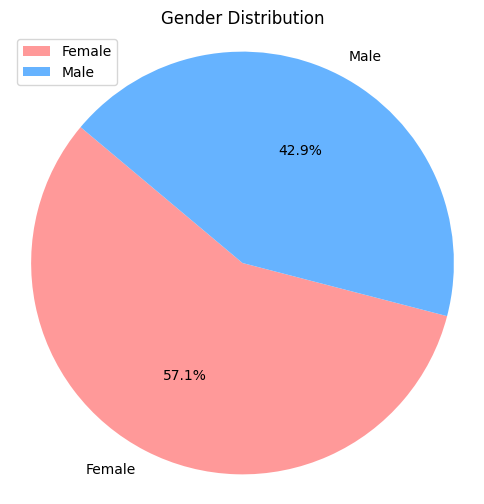

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(gender['count'], labels=gender['gender'], autopct='%1.1f%%', startangle=140,colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(loc = 'upper left')
plt.title('Gender Distribution')
plt.show()

**show the number of male and female in data**

<h2>number of male and female are smoke<h2>

In [18]:
male_female_smoke = df[df['smoke'] == 'Yes'].groupby('gender').value_counts().reset_index()
male_female_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,count
0,Female,16,Single,GCSE/CSE,British,White,"Under 2,600",Midlands & East Anglia,Yes,2.0,2.0,Packets,1
1,Female,16,Single,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,12.0,12.0,Packets,1
2,Female,17,Single,GCSE/CSE,Scottish,White,"5,200 to 10,400",Scotland,Yes,20.0,15.0,Packets,1
3,Female,17,Single,GCSE/O Level,English,White,"Under 2,600",South West,Yes,20.0,10.0,Both/Mainly Packets,1
4,Female,18,Single,GCSE/O Level,British,White,Refused,The North,Yes,8.0,8.0,Hand-Rolled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Male,77,Divorced,Other/Sub Degree,English,White,"5,200 to 10,400",Scotland,Yes,20.0,10.0,Packets,1
417,Male,77,Married,No Qualification,English,White,"2,600 to 5,200",South East,Yes,15.0,15.0,Packets,1
418,Male,78,Widowed,No Qualification,British,White,"5,200 to 10,400",South West,Yes,15.0,12.0,Packets,1
419,Male,78,Widowed,No Qualification,English,White,"5,200 to 10,400",The North,Yes,50.0,50.0,Both/Mainly Packets,1


In [19]:
malefemalesmoke = male_female_smoke['gender'].value_counts().reset_index()
malefemalesmoke

,gender,count
0,Female,234
1,Male,187


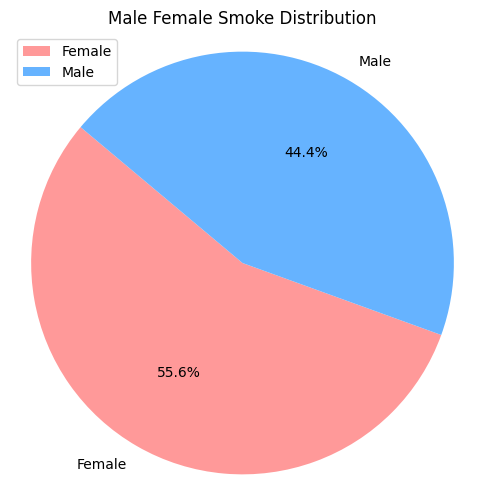

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(malefemalesmoke['count'], labels=malefemalesmoke['gender'], autopct='%1.1f%%', startangle=140,colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(loc = 'upper left')
plt.title('Male Female Smoke Distribution')
plt.show()

**From this Graph we can see the number of women is bigger than male about smoking**

<h2>Average age per male and female<h2>

In [21]:
avg_age = df.groupby('gender')['age'].mean().reset_index()
avg_age

,gender,age
0,Female,50.348187
1,Male,49.155647


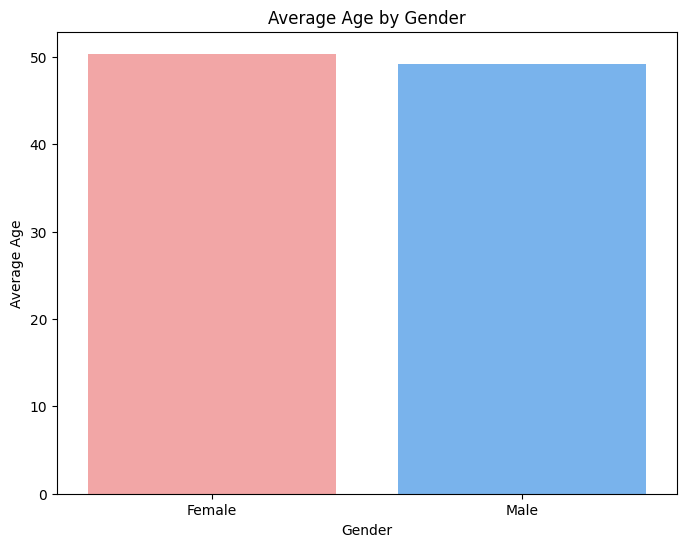

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='age', data=avg_age, palette=['#ff9999', '#66b3ff'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

**From this graph we can see the avg of age of male and female and we found no diff in age**

<h2>marital_status<h2>

In [23]:
marital_status = df['marital_status'].value_counts().reset_index()
marital_status

,marital_status,count
0,Married,812
1,Single,427
2,Widowed,223
3,Divorced,161
4,Separated,68


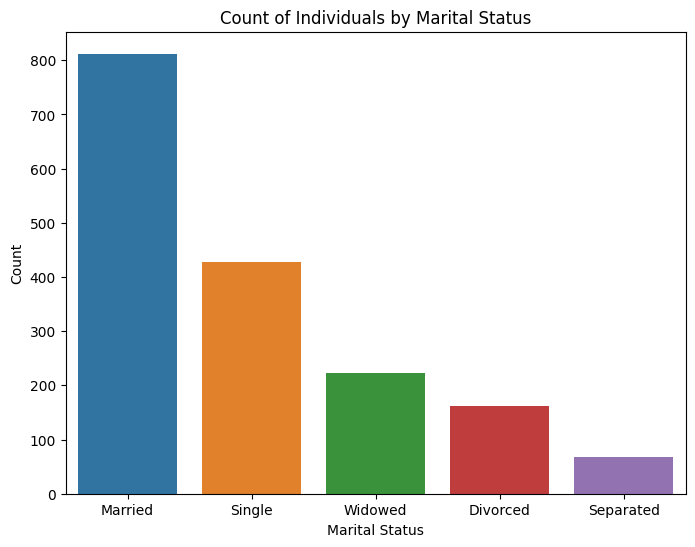

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='marital_status', y='count', data=marital_status)
plt.title('Count of Individuals by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

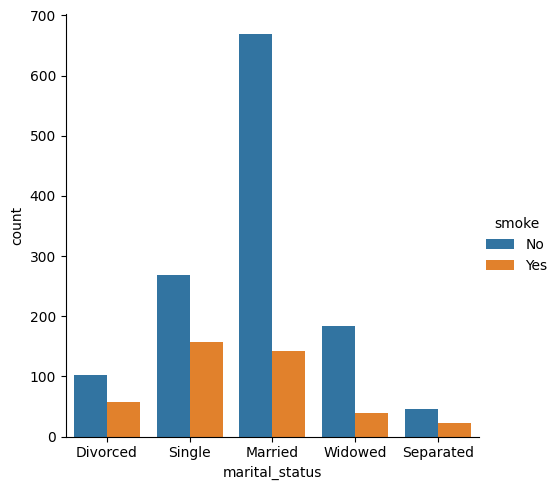

In [25]:
sns.catplot(x="marital_status", hue="smoke", kind="count", data=df)

**This Graph show the number of each marital_status and who smoke more and who smoke less**

In [26]:
highest_qualification = df['highest_qualification'].value_counts().reset_index()
highest_qualification

,highest_qualification,count
0,No Qualification,586
1,GCSE/O Level,308
2,Degree,262
3,Other/Sub Degree,127
4,Higher/Sub Degree,125
5,A Levels,105
6,GCSE/CSE,102
7,ONC/BTEC,76


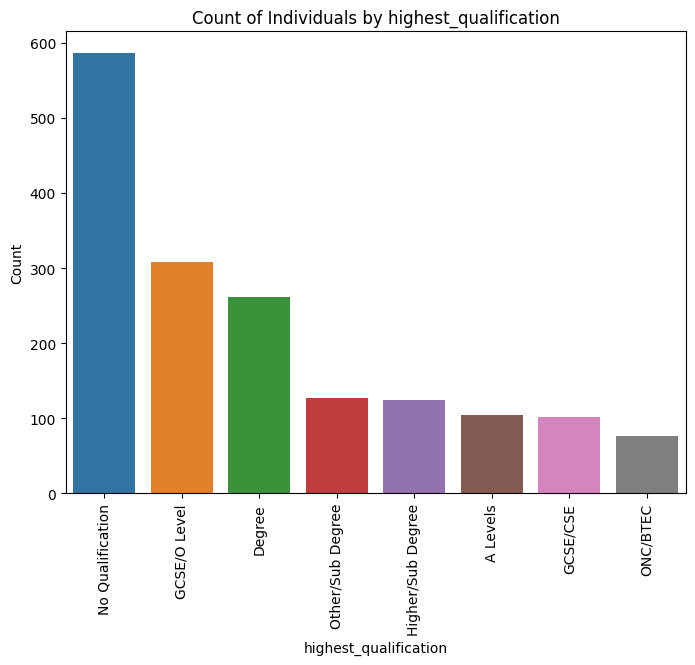

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='highest_qualification', y='count', data=highest_qualification)
plt.title('Count of Individuals by highest_qualification')
plt.xlabel('highest_qualification')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

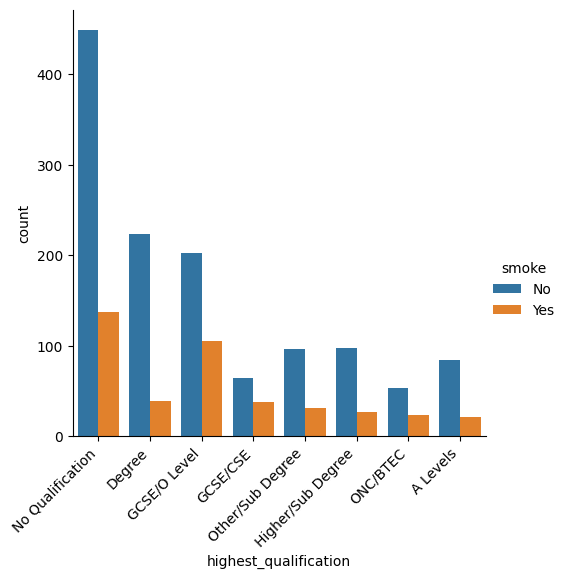

In [28]:
# plot highest_qualification against smoke with rotated xticks
ax = sns.catplot(x="highest_qualification", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

In [29]:
nationality = df['nationality'].value_counts().reset_index() 
nationality

,nationality,count
0,English,833
1,British,538
2,Scottish,142
3,Other,71
4,Welsh,66
5,Irish,23
6,Refused,17
7,Unknown,1


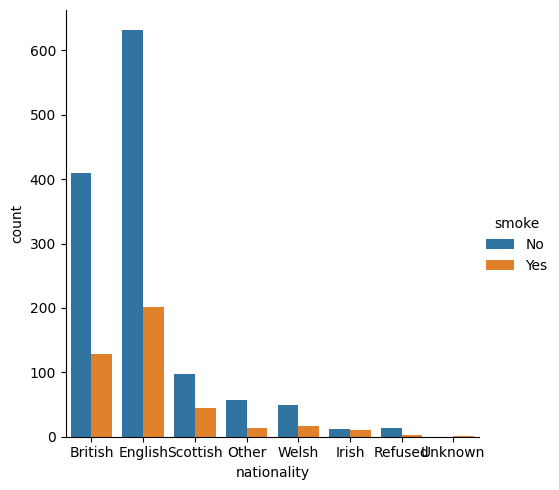

In [30]:
sns.catplot(x="nationality", hue="smoke", kind="count", data=df)

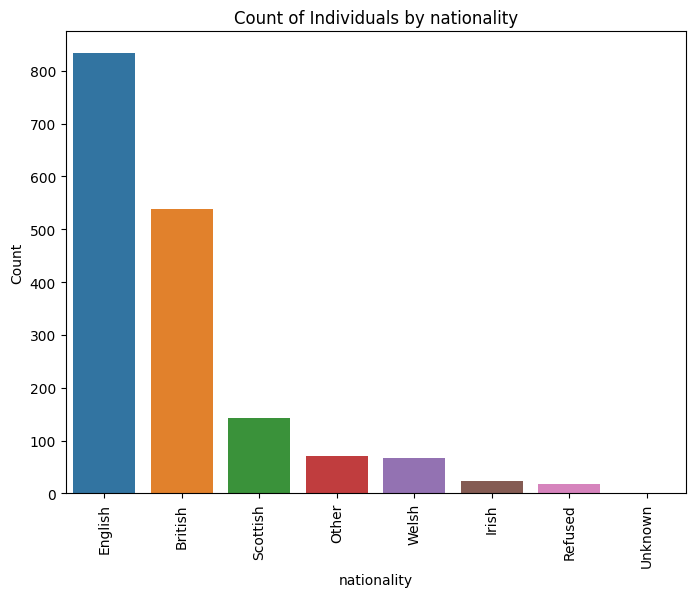

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='nationality', y='count', data=nationality)
plt.title('Count of Individuals by nationality')
plt.xlabel('nationality')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [32]:
ethnicity = df['ethnicity'].value_counts().reset_index()
ethnicity

,ethnicity,count
0,White,1560
1,Asian,41
2,Black,34
3,Chinese,27
4,Mixed,14
5,Refused,13
6,Unknown,2


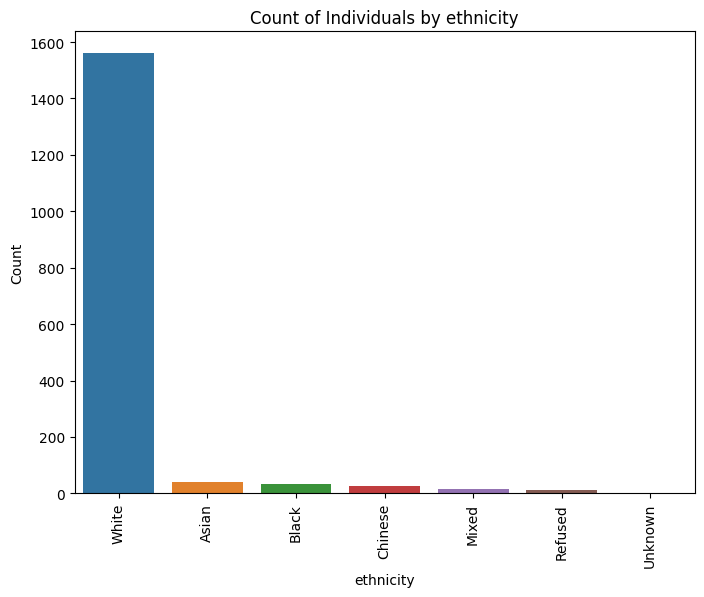

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ethnicity', y='count', data=ethnicity)
plt.title('Count of Individuals by ethnicity')
plt.xlabel('ethnicity')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [34]:
region = df['region'].value_counts().reset_index()
region

,region,count
0,Midlands & East Anglia,443
1,The North,426
2,South East,252
3,London,182
4,South West,157
5,Scotland,148
6,Wales,83


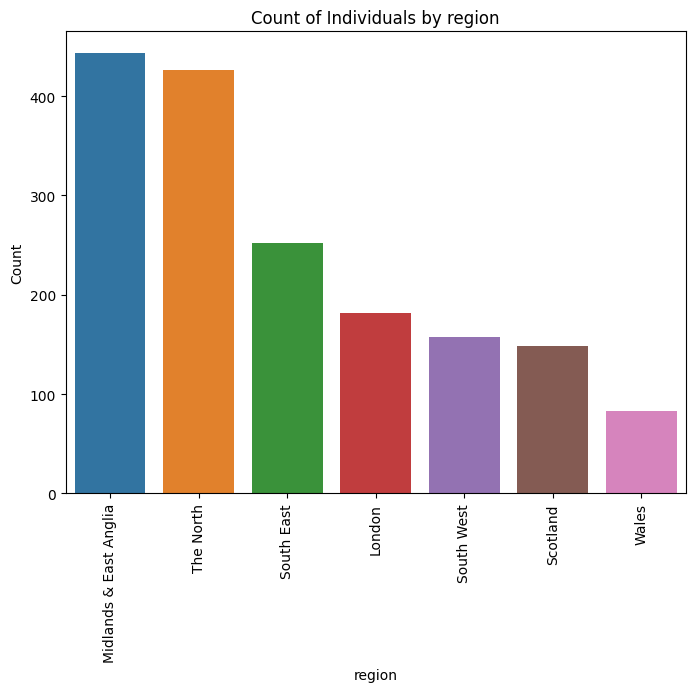

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='count', data=region)
plt.title('Count of Individuals by region')
plt.xlabel('region')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

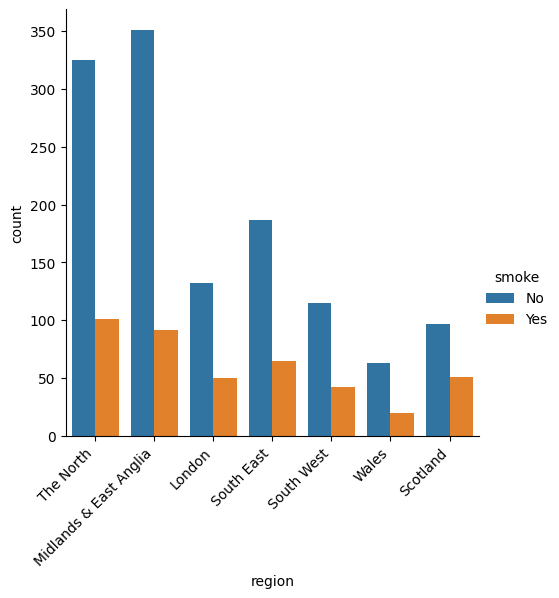

In [36]:
# plot highest_qualification against smoke with rotated xticks
ax = sns.catplot(x="region", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [37]:
type1 = df['type'].value_counts().reset_index() 
type1 

,type,count
0,Non-Smoker,1270
1,Packets,297
2,Hand-Rolled,72
3,Both/Mainly Packets,42
4,Both/Mainly Hand-Rolled,10


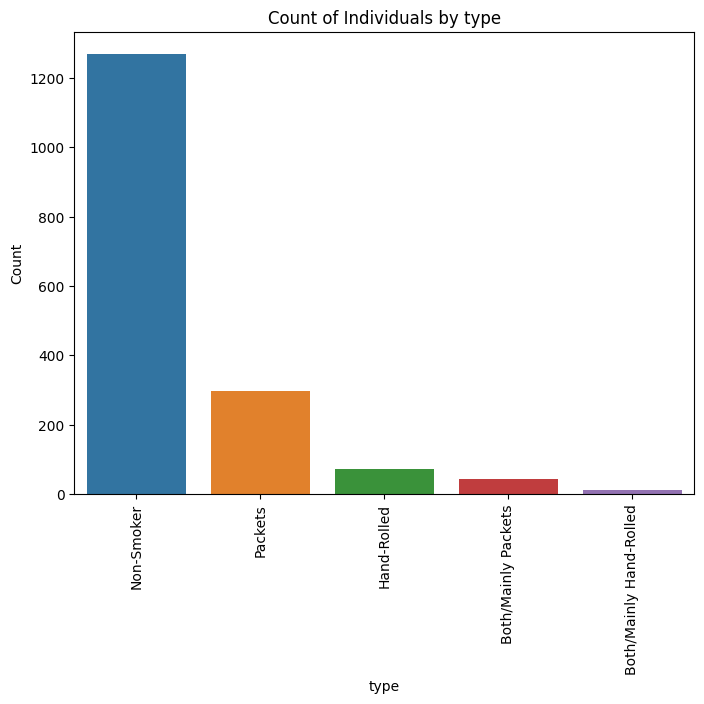

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='count', data=type1)
plt.title('Count of Individuals by type')
plt.xlabel('type')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [39]:
gross_income = df['gross_income'].value_counts().reset_index() 
gross_income

,gross_income,count
0,"5,200 to 10,400",396
1,"10,400 to 15,600",268
2,"2,600 to 5,200",257
3,"15,600 to 20,800",188
4,"20,800 to 28,600",155
5,"Under 2,600",133
6,Refused,108
7,"Above 36,400",89
8,"28,600 to 36,400",79
9,Unknown,18


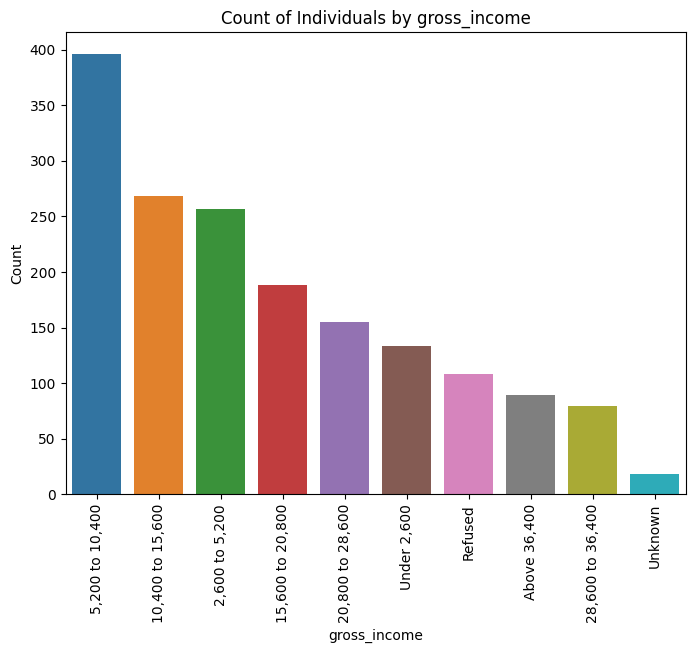

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gross_income', y='count', data=gross_income)
plt.title('Count of Individuals by gross_income')
plt.xlabel('gross_income')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

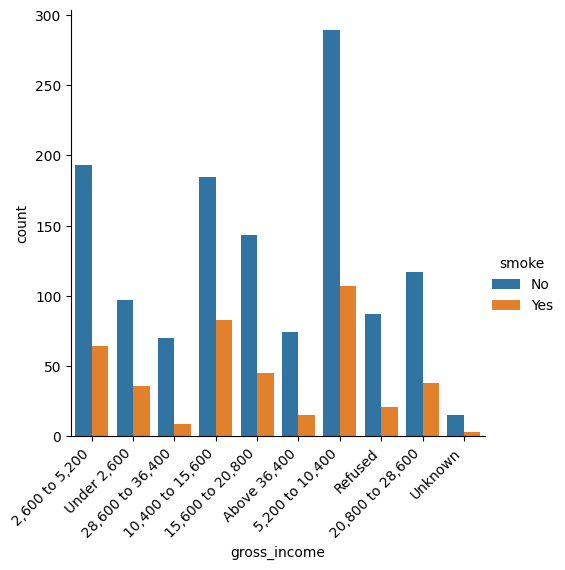

In [41]:
ax = sns.catplot(x="gross_income", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

In [42]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [43]:
histogram_labels = ['age',
                    'gross_income', 
                    'amt_weekends', 
                    'amt_weekdays'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

# Prepocessing the Data

In [44]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0.0,0.0,Non-Smoker
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0.0,0.0,Non-Smoker
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0.0,0.0,Non-Smoker


**Target column is Smoke**

<h2>Label Encoder<h2>

In [45]:
le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [46]:
df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,38,0,5,0,6,2,5,0,0.0,0.0,3
1,0,42,3,5,0,6,8,5,1,12.0,12.0,4
2,1,40,1,1,1,6,4,5,0,0.0,0.0,3
3,0,40,1,1,1,6,0,5,0,0.0,0.0,3
4,0,39,1,3,0,6,2,5,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2,0,0.0,0.0,3
1687,0,49,0,7,1,6,2,2,1,20.0,20.0,2
1688,1,45,1,7,5,6,5,2,0,0.0,0.0,3
1689,0,51,1,5,1,6,2,2,1,20.0,20.0,4


<Axes: >

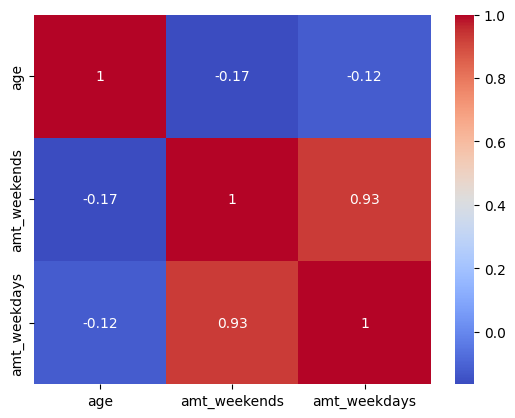

In [47]:
# Selecting the numerical columns
numerical_columns = ['age', 'amt_weekends', 'amt_weekdays']

# Calculating the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**i will drop this data when build model becouse no affect in the data**

In [48]:
df.drop(columns=['amt_weekends','amt_weekdays','type'],inplace=True)

**Drop Columns don't i need**

In [49]:
df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0
...,...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2,0
1687,0,49,0,7,1,6,2,2,1
1688,1,45,1,7,5,6,5,2,0
1689,0,51,1,5,1,6,2,2,1


# Train Test Split

In [50]:
X = df.drop(columns='smoke',axis=1)
Y = df['smoke']

In [51]:
X

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region
0,1,38,0,5,0,6,2,5
1,0,42,3,5,0,6,8,5
2,1,40,1,1,1,6,4,5
3,0,40,1,1,1,6,0,5
4,0,39,1,3,0,6,2,5
...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2
1687,0,49,0,7,1,6,2,2
1688,1,45,1,7,5,6,5,2
1689,0,51,1,5,1,6,2,2


In [52]:
Y

0       0
1       1
2       0
3       0
4       0
       ..
1686    0
1687    1
1688    0
1689    1
1690    0
Name: smoke, Length: 1691, dtype: int64

In [53]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [54]:
X_train

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region
1247,0,35,1,1,0,6,0,3
189,0,57,1,1,1,6,5,5
384,0,56,1,5,0,6,8,5
1383,0,73,1,5,0,6,2,4
1538,0,40,0,3,1,6,0,6
...,...,...,...,...,...,...,...,...
16,0,30,3,1,1,6,3,5
58,1,89,4,5,0,6,5,5
277,0,28,1,5,0,6,8,5
255,1,62,1,5,1,6,3,5


In [55]:
Y_train

1247    0
189     0
384     0
1383    0
1538    0
       ..
16      0
58      0
277     0
255     0
1344    0
Name: smoke, Length: 1352, dtype: int64

In [56]:
x_test

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region
497,1,72,1,5,0,6,5,1
544,0,42,3,3,0,6,5,1
1534,1,66,3,4,1,6,0,6
1690,1,31,1,1,5,6,0,2
786,0,34,1,1,0,6,8,1
...,...,...,...,...,...,...,...,...
705,0,34,2,3,1,6,5,1
261,1,48,4,5,1,6,0,5
468,0,50,1,3,1,6,5,1
233,1,27,3,6,1,6,7,5


In [57]:
y_test

497     0
544     0
1534    0
1690    0
786     1
       ..
705     1
261     0
468     0
233     1
426     0
Name: smoke, Length: 339, dtype: int64

# Building Model

<h2>LogisticRegression<h2>

In [58]:
logreg = LogisticRegression()

In [59]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [60]:
logreg.score(X_train,Y_train)

0.7440828402366864

In [61]:
logreg.score(x_test,y_test)

0.7551622418879056

In [62]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       259
           1       0.40      0.07      0.13        80

    accuracy                           0.76       339
   macro avg       0.59      0.52      0.49       339
weighted avg       0.68      0.76      0.69       339



<h2>DescionTreeClassifier<h2>

In [64]:
DecisionTree = DecisionTreeClassifier()

In [65]:
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [66]:
DecisionTree.score(X_train,Y_train)

0.9970414201183432

In [67]:
DecisionTree.score(x_test,y_test)

0.6755162241887905

In [68]:
y_pred = DecisionTree.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       259
           1       0.33      0.38      0.35        80

    accuracy                           0.68       339
   macro avg       0.57      0.57      0.57       339
weighted avg       0.69      0.68      0.68       339



<h2>RandomForestClassifier<h2>

In [70]:
RandomForest = RandomForestClassifier(n_estimators=30)

In [71]:
RandomForest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [72]:
RandomForest.score(X_train,Y_train)

0.9933431952662722

In [73]:
RandomForest.score(x_test,y_test)

0.7522123893805309

In [74]:
y_pred = RandomForest.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       259
           1       0.43      0.16      0.24        80

    accuracy                           0.75       339
   macro avg       0.61      0.55      0.54       339
weighted avg       0.70      0.75      0.71       339



<h2>SVM(SVC)<h2>

In [76]:
svc = SVC()

In [77]:
svc.fit(X_train,Y_train)

SVC()

In [78]:
svc.score(X_train,Y_train)

0.7477810650887574

In [79]:
svc.score(x_test,y_test)

0.7640117994100295

In [80]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       259
           1       0.00      0.00      0.00        80

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Using kfold Cross Validation for model svm to improve accuracy**

In [82]:
cross_val_score(SVC(),X,Y,cv=5).mean()

0.751035939327294

In [83]:
cross_val_score(DecisionTreeClassifier(),X,Y,cv=5).mean()

0.6552250789827372

In [84]:
cross_val_score(LogisticRegression(),X,Y,cv=5).mean()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7451135431394111

In [85]:
cross_val_score(RandomForestClassifier(n_estimators=25),X,Y,cv=5).mean()

0.7232183065402943